# Кислотна денатурація білків

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import re
import os
plt.style.use('seaborn-whitegrid')

## Зчитування данних

In [96]:
data_dir = 'data'
files = os.listdir(data_dir)

# обираємо тільки файли з роширенням .txt
files = [file for file in files if file.endswith('.txt')]
files.remove('normal.txt')

# створюємо пустий датафрейм з колонками для кожного файлу + одна колонка буде довжинами хвиль
files = [data_dir + '/' + file for file in files]
spect = pd.DataFrame()

# зчитуємо довжини хвиль
f1 = pd.read_csv(files[0], sep='  ', engine='python')
f2 = pd.read_csv(data_dir + '/normal.txt', sep='  ', engine='python')
spect['lambda, nm'] = f1.iloc[:,0]
spect['control'] =  f2.iloc[:,1]

time = []
for idx, path in enumerate(files):
    p = re.compile(r'_\d*m')
    dur = p.search(path).group(0)[1:-1]
    time.append( int(dur) )
    f = pd.read_csv(path, sep='  ', engine='python')
    spect[int(dur)] = f.iloc[:,1]
time = sorted(time)
spect

,"lambda, nm",control,3,30,1,50,40,2,20,25,4,10,60,15,5
0,699.0,0.015,0.130,0.018,0.107,0.015,0.015,0.130,0.122,0.036,0.130,0.194,0.015,0.218,0.137
1,698.0,0.015,0.130,0.018,0.107,0.015,0.015,0.130,0.122,0.036,0.130,0.195,0.015,0.219,0.137
2,697.0,0.015,0.130,0.018,0.107,0.015,0.015,0.130,0.123,0.036,0.130,0.195,0.015,0.219,0.137
3,696.0,0.015,0.131,0.018,0.108,0.016,0.015,0.131,0.123,0.036,0.131,0.196,0.015,0.220,0.138
4,695.0,0.015,0.131,0.018,0.108,0.016,0.015,0.131,0.123,0.036,0.131,0.196,0.015,0.220,0.138
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
505,194.0,3.780,4.000,3.081,4.000,3.081,3.780,4.000,3.479,3.178,4.000,4.000,3.002,4.000,4.000
506,193.0,3.708,4.000,3.009,4.000,3.009,3.708,4.000,3.407,3.106,4.000,3.708,3.009,4.000,4.000
507,192.0,4.000,4.000,2.926,4.000,2.926,4.000,4.000,3.324,3.023,4.000,4.000,2.847,4.000,4.000
508,191.0,3.526,4.000,2.827,4.000,2.827,3.526,4.000,3.225,2.924,4.000,4.000,2.827,4.000,3.526


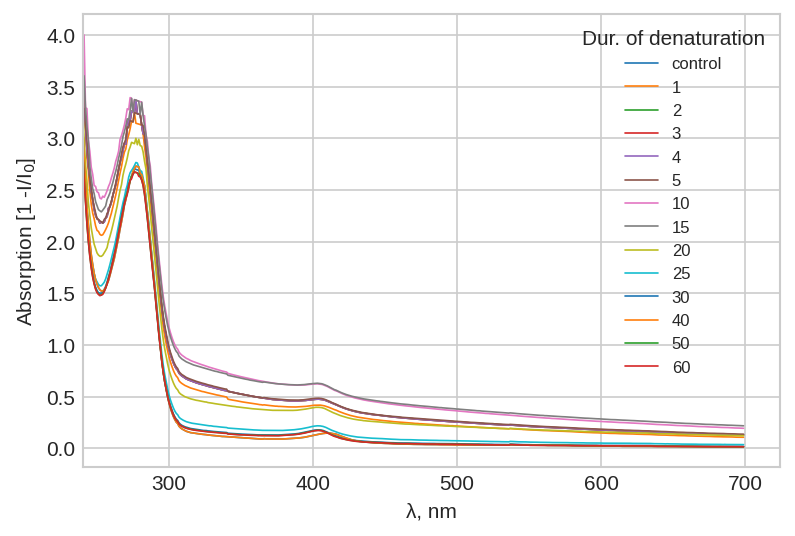

In [108]:
plt.figure(dpi=150);
plt.plot(spect['lambda, nm'], spect['control'], lw=0.8, label='control')
for i in time:
    plt.plot(spect['lambda, nm'], spect[i], lw=0.8, label=i)
plt.legend(title='Dur. of denaturation', fontsize=8);
plt.xlabel('λ, nm');
plt.xlim(240, )
plt.ylabel('Absorption [1 -I/I$_0$]');